In [1]:
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [2]:
df = pd.read_csv('Position_CSV/RB_stacked.csv')
df.head()

,name,approximate_value,games.x,AVp16,X1,adjusted_yards_per_attempt,assists_on_tackles,completed_passes,extra_points_made,field_goals_made,...,total_touchdowns,two_point_conversions,weight,yards_from_scrimmage,yards_from_scrimmage_per_play,yards_recovered_from_fumble,yards_returned_from_interceptions,yards_returned_per_interception,year,X
0,Ameer Abdullah,13,58,3.586207,Career,0.0,0.0,0.0,0.0,0.0,...,48.0,NaN,195.0,5278.0,6.0,NaN,0.0,NaN,NaN,NaN
1,Josh Adams,3,17,2.823529,Career,NaN,0.0,NaN,NaN,NaN,...,23.0,NaN,212.0,2823.0,4.5,NaN,0.0,NaN,NaN,NaN
2,Joseph Addai,54,78,11.076923,NaN,NaN,1.0,NaN,NaN,NaN,...,24.0,NaN,NaN,3217.0,5.8,NaN,0.0,NaN,NaN,Career
3,Jay Ajayi,20,45,7.111111,Career,NaN,0.0,NaN,0.0,0.0,...,55.0,NaN,216.0,4567.0,6.1,NaN,0.0,NaN,NaN,NaN
4,Shaun Alexander,79,123,10.276423,NaN,0.0,NaN,0.0,NaN,NaN,...,50.0,NaN,NaN,4363.0,5.5,NaN,NaN,NaN,NaN,Career


In [3]:
df.drop(['name', 'approximate_value', 'games.x', 'X1', 'height', 'player_id', 'position', 'team_abbreviation', 'season', 'year', 'X'], axis=1, inplace=True)

In [4]:
df.fillna(0, inplace=True)

In [5]:
from sklearn.model_selection import train_test_split

X = np.asarray(df[['kickoff_return_touchdowns', 'other_touchdowns', 'points', 'punt_return_touchdowns', 'receiving_touchdowns', 'receiving_yards', 'receiving_yards_per_reception', 'receptions', 'rush_attempts', 'rush_touchdowns', 'rush_yards', 'rush_yards_per_attempt', 'rushing_and_receiving_touchdowns', 'total_touchdowns', 'two_point_conversions', 'yards_from_scrimmage', 'yards_from_scrimmage_per_play']])
Y = np.asarray(df['AVp16'])
                  

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)

Score:  0.23858106424814374
Weights:  [-4.59689904e-01 -1.79372576e-14 -2.55268005e-02 -2.86816263e-02
 -7.99204113e-02  6.09215913e-04  1.81136754e-02 -1.62278358e-02
 -6.27540334e-03  2.34266435e-02  4.32045896e-04  2.83719659e-01
 -5.64937679e-02  2.24097363e-01 -6.85055488e-01  1.04126181e-03
  3.72213345e-02]


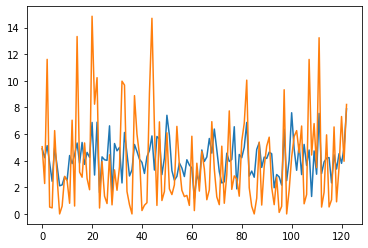

In [6]:
from sklearn.linear_model import LinearRegression

lineReg = LinearRegression()
lineReg.fit(X_train, y_train)
print('Score: ', lineReg.score(X_test, y_test))
print('Weights: ', lineReg.coef_)

plt.plot(lineReg.predict(X_test))
plt.plot(y_test)
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

X = np.asarray(df[['other_touchdowns', 'receiving_yards', 'two_point_conversions']])
Y = np.asarray(df['AVp16'])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)

Score:  0.027067247790330873
Weights:  [0.         0.0018872  0.14107004]


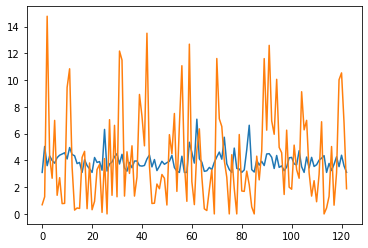

In [10]:
from sklearn.linear_model import LinearRegression

lineReg = LinearRegression()
lineReg.fit(X_train, y_train)
print('Score: ', lineReg.score(X_test, y_test))
print('Weights: ', lineReg.coef_)

plt.plot(lineReg.predict(X_test))
plt.plot(y_test)
plt.show()

Score:  0.02707062362029178
Weights:  [0.         0.00188757 0.13004729]


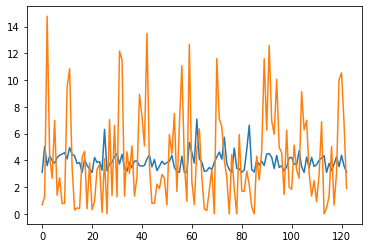

In [11]:
from sklearn import linear_model
reg = linear_model.Ridge (alpha = .5)
reg.fit(X_train, y_train)
print('Score: ', reg.score(X_test, y_test))
print('Weights: ', reg.coef_)

plt.plot(reg.predict(X_test))
plt.plot(y_test)
plt.show()

In [12]:
scores = []
coefs = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)
    lineReg = LinearRegression()
    lineReg.fit(X_train, y_train)
    scores.append(lineReg.score(X_test, y_test))
    coefs.append(lineReg.coef_)
print('Linear Regression')
print(np.mean(scores))
print(np.mean(coefs, axis=0))

scores = []
coefs = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)
    lineReg = linear_model.Ridge (alpha = .5)
    lineReg.fit(X_train, y_train)
    scores.append(lineReg.score(X_test, y_test))
    coefs.append(lineReg.coef_)
print('\nRidge Regression')
print(np.mean(scores))
print(np.mean(coefs, axis=0))

Linear Regression
0.005922977869539523
[0.         0.00182321 0.59490796]

Ridge Regression
0.01080119895610576
[0.         0.00180375 0.46958951]
